# Análise de desempenho - `spinlocks`

## Importação das bibliotecas

In [1]:
from os import makedirs
from math import log10
import subprocess

import matplotlib.pyplot as plt
import pandas as pd

makedirs("./data", exist_ok=True)

## Criação de DataFrame para os resultados

In [3]:
results_df = pd.DataFrame(columns=[
    "n",
    "k",
    "elapsed",
    "mean_elapsed"
])
results_df = pd.read_csv("./data/results.csv", sep=";")

In [5]:
print(results_df.to_latex(index=False))

\begin{tabular}{rrlr}
\toprule
           n &   k &                                            elapsed &  mean\_elapsed \\
\midrule
  10000000.0 &   1 &                     [3, 3, 3, 3, 3, 5, 3, 3, 2, 3] &           3.1 \\
  10000000.0 &   2 &                     [2, 2, 2, 2, 2, 2, 2, 2, 2, 2] &           2.0 \\
  10000000.0 &   4 &                     [2, 2, 3, 2, 2, 2, 1, 1, 2, 3] &           2.0 \\
  10000000.0 &   8 &                     [2, 1, 2, 2, 2, 2, 2, 2, 3, 1] &           1.9 \\
  10000000.0 &  16 &                     [3, 2, 1, 1, 1, 1, 1, 2, 1, 1] &           1.4 \\
  10000000.0 &  32 &                     [2, 2, 3, 3, 1, 1, 1, 2, 1, 1] &           1.7 \\
  10000000.0 &  64 &                     [4, 2, 2, 1, 1, 2, 1, 1, 1, 1] &           1.6 \\
  10000000.0 & 128 &                     [5, 1, 1, 1, 1, 1, 1, 1, 1, 1] &           1.4 \\
  10000000.0 & 256 &                     [5, 2, 2, 2, 2, 3, 3, 2, 2, 3] &           2.6 \\
 100000000.0 &   1 &           [26, 37, 27, 26, 3

/tmp/ipykernel_13025/2101732907.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.to_latex(index=False))


## Execução do programa `spinlocks` para diferentes<br>parâmetros de $N$ e $K$

In [3]:
t = 10

try:
    for n in [1e7, 1e8, 1e9]:
        for k in [1, 2, 4, 8, 16, 32, 64, 128, 256]:
            command = subprocess.getoutput(
                f"./target/release/spinlocks -n {int(n)} -k {k} -t {t}"
            )
            elapsed = [
                int(i)
                for i in command.splitlines()[-1][1:-1].replace(" ","").split(",")
            ]
            results_df = pd.concat([
                results_df,
                pd.DataFrame([{
                    "n": n,
                    "k": k,
                    "elapsed": elapsed,
                    "mean_elapsed": sum(elapsed)/len(elapsed)
                }])
            ])
except Exception:
    print("N:", n, "K:", k)
    print("-"*20)
    print(command)
    print("-"*20)

## Exportação dos resultados

In [4]:
results_df.to_csv("./data/results.csv", sep=";", index=False)

## Gráfico com resultados

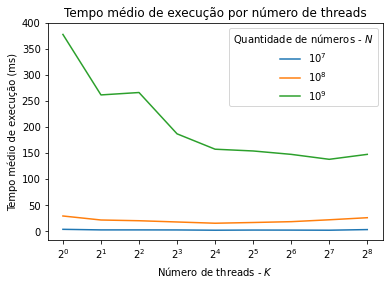

In [6]:
for x in sorted(results_df["n"].unique()):
    x_df = results_df.loc[results_df["n"] == x]
    plt.plot(x_df["k"], x_df["mean_elapsed"], label=f"$10^{int(log10(x))}$")
plt.xscale("log", base=2)
plt.xticks([2**i for i in range(9)])
plt.xlabel("Número de threads - $K$")
plt.yticks([50*i for i in range(9)])
plt.ylabel("Tempo médio de execução (ms)")
plt.title("Tempo médio de execução por número de threads")
plt.legend(title="Quantidade de números - $N$")
plt.savefig("./data/results_chart.png", format="png", dpi=300);